### 목표
- 손 글씨 숫자 이미지 데이터를 활용하여 분류 모델을 생성해보자
- 선형 분류모델의 불확실성을 확인
- 이미지 데이터의 형태를 이해해보자

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 데이터 불러오기

In [2]:
# digit_data 변수에 불러와서 저장해보기
digit_data = pd.read_csv('data/digit_train.csv')
# 위에서 5개 행 확인
digit_data.head() 
# pixel 0~783 => 784 (행28,열28) 문제
# label => 답

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# 데이터 크기
digit_data.shape
# 42000 장의 이미지 데이터 - 행
# 1개의 행은 1장의 이미지
# 785 중 0번째는 답, 1~ 특성

(42000, 785)

#### EDA 탐색적 데이터 분석

In [4]:
# 이미지 한장을 기준으로 분석해보기
# 이미지 내의 데이터 표현 범위 확인하기
img0 = digit_data.iloc[0,1:]
img0
img0_lb = digit_data.iloc[0,0]
img0_lb # 이미지에 대한 실제 답 => 이미지에 써진 숫자값

1

In [5]:
# 최대값, 최솟값 확인
print('최대:', img0.max())
print('최소:', img0.min())
# 기술통계값
img0.describe()
# 중복없이 값 확인
img0.unique()

# 흑백 이미지 데이터 색의 범위 : 0 ~ 255
# 0 검은색
# 255 흰색

최대: 255
최소: 0


array([  0, 188, 255,  94, 191, 250, 253,  93, 123, 248, 167,  10,  80,
       247, 208,  13,  29, 207, 235,  77,  54, 209,  88, 254, 238, 170,
        17,  23, 210, 159,  16, 240,  81,  27,  20, 206, 198,   7, 168,
       196, 203,  76,  22, 245, 103,  89, 195,  25,  15, 220, 251, 131,
       214, 218,  95], dtype=int64)

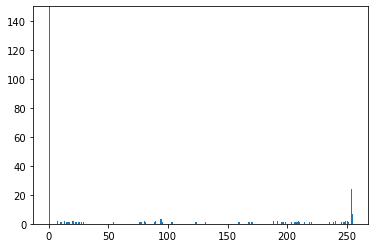

In [6]:
# 히스토그램 - 숫자데이터의 분포 현황 확인
plt.hist(img0, bins= 255) # bins 범위설정
plt.ylim(0, 150) # y축 범위 설정
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

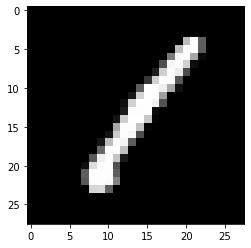

In [7]:
# 이미지로 확인해보기
# reshape -> 크기를 변경 하는 함수 
plt.imshow(img0.values.reshape(28,28), cmap = 'gray')
plt.show

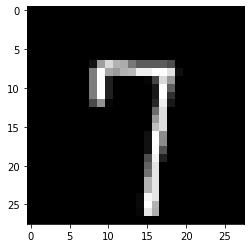

실제답: 7


In [8]:
# 50번째 이미지 출력해보기
img = digit_data.iloc[50,1:]
img
img_lb = digit_data.iloc[50,0]
plt.imshow(img.values.reshape(28,28), cmap = 'gray')
plt.show() # 이미지 출력
print('실제답:', img_lb) # 답출력

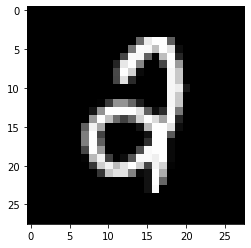

실제답: 2


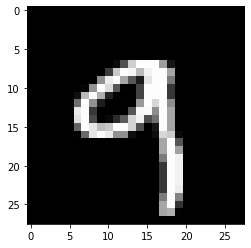

실제답: 9


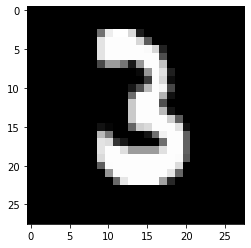

실제답: 3


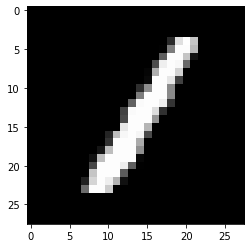

실제답: 1


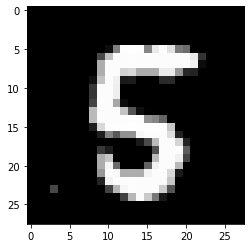

실제답: 5


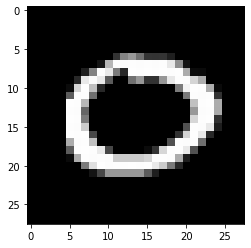

실제답: 0


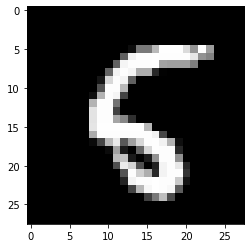

실제답: 5


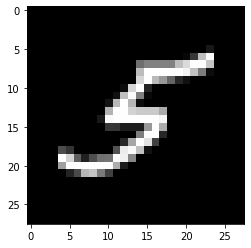

실제답: 5


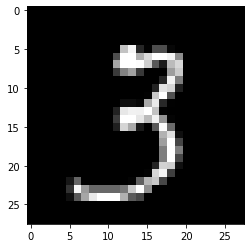

실제답: 3


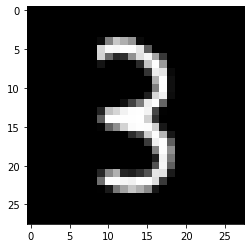

실제답: 3


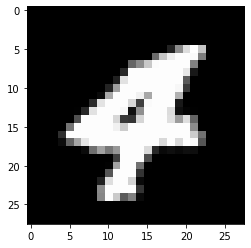

실제답: 4


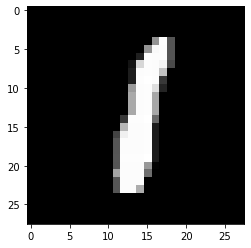

실제답: 1


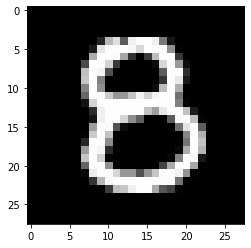

실제답: 8


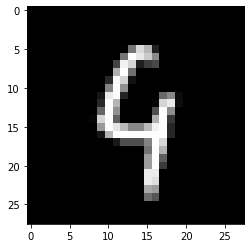

실제답: 4


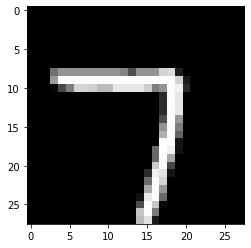

실제답: 7


In [9]:
# 여러장의 이미지 확인해보기
for i in range(10000,10030,2):
    img = digit_data.iloc[i,1:]
    img_lb = digit_data.iloc[i,0]
    plt.imshow(img.values.reshape(28,28), cmap = 'gray')
    plt.show()
    print('실제답:', img_lb)

In [10]:
# 클래스의 개수는 몇개일까?
np.sort(digit_data['label'].unique())

# 클래스의 다양성 확인
digit_data['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [11]:
# 5000장만 사용할 예정
X = digit_data.iloc[:5000,1:]
y = digit_data.iloc[:5000,0]
print(X.shape)
print(y.shape)

(5000, 784)
(5000,)


In [12]:
# 훈련셋, 테스트셋 분할
# 7 : 3
# 7 고정
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size = 0.3,
                                                random_state = 7)

print('훈련문제:', X_train.shape)
print('훈련답:', y_train.shape)
print('테스트문제', X_test.shape)
print('테스트답:', y_test.shape)

훈련문제: (3500, 784)
훈련답: (3500,)
테스트문제 (1500, 784)
테스트답: (1500,)


#### 모델링(교차검증 활용)
- knn
- tree
- logi
- svm

In [13]:
from sklearn.neighbors import KNeighborsClassifier  # knn분류
from sklearn.tree import DecisionTreeClassifier # tree분류
from sklearn.linear_model import LogisticRegression # logi분류
from sklearn.svm import LinearSVC # svm 분류
from sklearn.model_selection import cross_val_score # 교차검증 도구
import warnings
warnings.filterwarnings(action = 'ignore') # 경고창 무시

In [14]:
knn_model = KNeighborsClassifier() # 하이퍼파라미터 n_neighbors 이웃의 수
tree_model = DecisionTreeClassifier() # 하이퍼파라미터 max_depth 최대깊이설정
logi_model = LogisticRegression() # 하이퍼파라미터 C
svm_model = LinearSVC() # 하이퍼파라미터 C , gamma 

In [15]:
# 교차검증
# 횟수 5
knn_result = cross_val_score(knn_model, X_train, y_train, cv = 5)
tree_result = cross_val_score(tree_model, X_train, y_train, cv = 5)
logi_result = cross_val_score(logi_model, X_train, y_train, cv = 5)
svm_result = cross_val_score(svm_model, X_train, y_train, cv = 5)

In [16]:
# 검증 결과 확인
print('knn모델 교차검증 평균결과 :',knn_result.mean())
print('tree모델 교차검증 평균결과 :',tree_result.mean())
print('logi모델 교차검증 평균결과 :',logi_result.mean())
print('svm모델 교차검증 평균결과 :',svm_result.mean())

knn모델 교차검증 평균결과 : 0.9185714285714285
tree모델 교차검증 평균결과 : 0.7291428571428572
logi모델 교차검증 평균결과 : 0.8754285714285717
svm모델 교차검증 평균결과 : 0.8214285714285715


- 스케일링 : svm 모델 성능 향상시켜보기

In [17]:
# 특성 데이터의 범위 0~255
from sklearn.preprocessing import MinMaxScaler

In [26]:
# 스케일러 생성
min_max_sc = MinMaxScaler()

# 현재 특성 데이터의 범위 확인(학습)
min_max_sc.fit(X_train)

# 각 피처의 범위가 모두 0~1로 동등하게 분포를 변경해야하기 때문에
# 데이터의 범위를 확인할 필요가 있음
# 동시 실행 fit_transform()

NameError: name 'fit_transform' is not defined

(array([570.,  16.,  11.,   8.,   6.,  20.,  15.,   8.,  11., 119.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

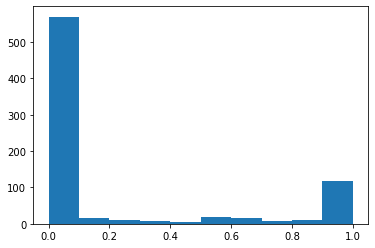

In [19]:
X_train_scaled = min_max_sc.transform(X_train)
X_train_scaled
plt.hist(X_train_scaled[0])

(array([617.,  19.,   6.,   5.,  14.,   5.,  15.,   4.,  10.,  89.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

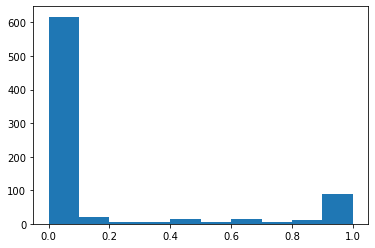

In [20]:
X_test_scaled = min_max_sc.transform(X_test)
plt.hist(X_test_scaled[0])

In [21]:
# svm 모델 교차검증
svm_result2 = cross_val_score(svm_model, X_train_scaled,y_train, cv = 5)
svm_result2.mean()

0.8625714285714287

In [22]:
# svm -> 스케일링된 데이터 활용
knn_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
logi_model.fit(X_train, y_train)
svm_model.fit(X_train_scaled, y_train)

LinearSVC()

In [23]:
# score()
# 정확도 확인해보기
print('knn:',knn_model.score(X_test,y_test))
print('tree:',tree_model.score(X_test,y_test))
print('logi:',logi_model.score(X_test,y_test))
print('svm:',svm_model.score(X_test_scaled,y_test))

knn: 0.9113333333333333
tree: 0.758
logi: 0.8746666666666667
svm: 0.8593333333333333


In [24]:
# 모델의 하이퍼 파라미터를 변경 (하이퍼 파라미터 튜닝)
# 데이터 추가(확장), 클래스의 다양성 유지되고있는가? ,
# eda -> 변형할, 특성공학해볼 데이터 확인

#### 모델의 불확실성 확인

In [29]:
import pandas as pd
pd.options.display.float_format = '{:.15f}'.format
# pd.reset_option('display.float_format') -> 기본값으로 리셋

In [30]:
# logi 모델 기준으로 확인
# predict_proba()
pd.DataFrame(logi_model.predict_proba(X_test[:50]))

,0,1,2,3,4,5,6,7,8,9
0,1.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000
1,0.999999998553051,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000001446948,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000
2,0.000000000000000,1.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000
3,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,1.000000000000000,0.000000000000000,0.000000000000000
4,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,1.000000000000000,0.000000000000000,0.000000000000000
5,0.000000000000000,0.000000000000000,0.000000000000000,0.999999999422004,0.000000000000000,0.000000000577992,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000004
6,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,1.000000000000000,0.000000000000000,0.000000000000000
7,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.999999925383741,0.000000000000000,0.000000074616259
8,0.000000000000000,0.999917339446379,0.000000000000107,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000082660553514,0.000000000000000
9,0.000000000000000,0.000000000000000,0.000000000000000,1.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000
